In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

This image is:  <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


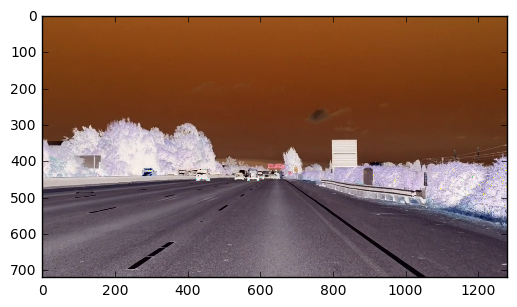

In [3]:
# Keeping the marking as white and rest of the content as Black
image=(mpimg.imread('test.jpg')*255).astype('uint8')

print('This image is: ',type(image),
         'with dimensions:', image.shape)

ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)
#Original Image
plt.imshow(color_select)

red_threshold=200
green_threshold=200
blue_threshold=200

rgb_threshold=[red_threshold,green_threshold,blue_threshold]

color_thresholds=(image[:,:,0]<rgb_threshold[0])|(image[:,:,1]<rgb_threshold[1])|(image[:,:,2]<rgb_threshold[2])
#color_select[thresholds]=[0,0,0]
#plt.imshow(color_select)
#mpimg.imsave("test-after.png", color_select)

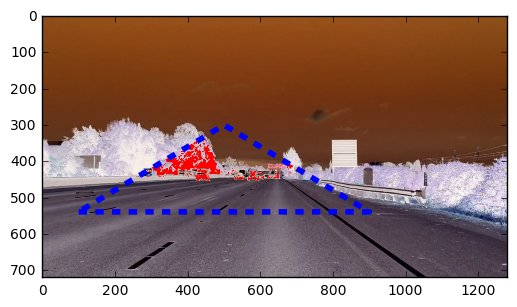

In [4]:
# Selecting only the lines
left_bottom = [100, 539]
right_bottom = [900, 539]
apex = [500, 300]

left_fit=np.polyfit([left_bottom[0],apex[0]],(left_bottom[1],apex[1]),1)
right_fit=np.polyfit([right_bottom[0],apex[0]],(right_bottom[1],apex[1]),1)
bottom_fit=np.polyfit([left_bottom[0],left_bottom[1]],(right_bottom[0],right_bottom[1]),1)

XX,YY=np.meshgrid(np.arange(0,xsize),np.arange(0,ysize))

# Select Triange for the desired region
region_thresholds=(YY>(XX*left_fit[0]+left_fit[1]))&(YY>(XX*right_fit[0]+right_fit[1]))&(YY<(XX*bottom_fit[0]+bottom_fit[1]))
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]
plt.imshow(image)

x=[left_bottom[0],right_bottom[0],apex[0],left_bottom[0]]
y=[left_bottom[1],right_bottom[1],apex[1],left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)

In [5]:
#Cannt Edge Detection
import cv2

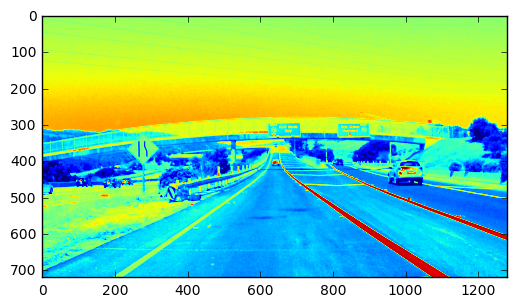

In [8]:
image=(mpimg.imread('exit_ramp.png')*255).astype('uint8')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

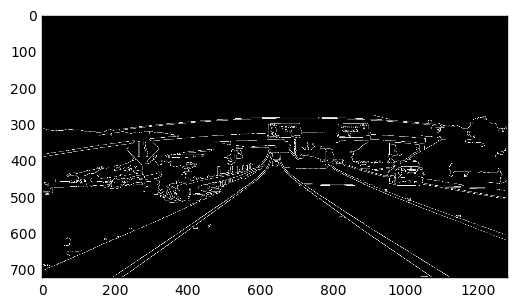

In [9]:
kernel_size = 3 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
# Define our parameters for Canny and run it
low_threshold = 50
high_threshold = 200
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')